In [8]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa


In [9]:
def parser1(row):
    file_name = os.path.join("train_data", 'Crying','train_cry ('+str(row)+')' +'.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64)
        mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        mfcc=np.mean(mfccs.T,axis=0) 
        #spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
        #spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)
        #rms=librosa.feature.rms(X, frame_length=2048, hop_length=512, center=True, pad_mode='reflect')
        #zcr =librosa.feature.zero_crossing_rate(X, frame_length=512, hop_length=168, center=True)
        #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    print(row)
    return mfcc


In [10]:
def parser2(row):
    #file_name = os.path.join("train_data", 'Noise','train_noise ('+str(row)+')' +'.wav')
    file_name = os.path.join("six_sec_glass", 'g'+str(row) +'.wav')


    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64)
        mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        mfcc=np.mean(mfccs.T,axis=0) 
        #spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
        #spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)
        #rms=librosa.feature.rms(X, frame_length=2048, hop_length=512, center=True, pad_mode='reflect') 
        #zcr = librosa.feature.zero_crossing_rate(X, frame_length=512, hop_length=168, center=True)
        #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        
        print("Error encountered while parsing file: ", file)
        return None, None

    print(row)
    return mfcc

In [11]:
def parser3(row):
    #file_name = os.path.join("train_data", 'Noise','train_noise ('+str(row)+')' +'.wav')
    file_name = os.path.join("noise_18jul",'noise'+str(row) +'.wav')

    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64)
        mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        mfcc=np.mean(mfccs.T,axis=0) 
        #spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
        #spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)
        #rms=librosa.feature.rms(X, frame_length=2048, hop_length=512, center=True, pad_mode='reflect') 
        #zcr = librosa.feature.zero_crossing_rate(X, frame_length=512, hop_length=168, center=True)
        #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        
        print("Error encountered while parsing file: ", file)
        return None, None

    print(row)
    return mfcc

In [14]:
def feature():
    features=np.empty((0,64))
    label=np.empty((0,1))
   
    #noise 
    #1703
    #114,115,159,161,319,326
    for i in range(1,100):
        mfccs=parser3(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,0))
    
    for i in range(328,1703):
        mfccs=parser3(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,0))
    #cry
    #1200
    for i in range(1,1200):
        mfccs=parser1(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,1))
    #glass
    #1024
    for i in range(1,1024):
        mfccs=parser2(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,2))
    
   
        
    return features,label

In [15]:
f,l=feature()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505


454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703


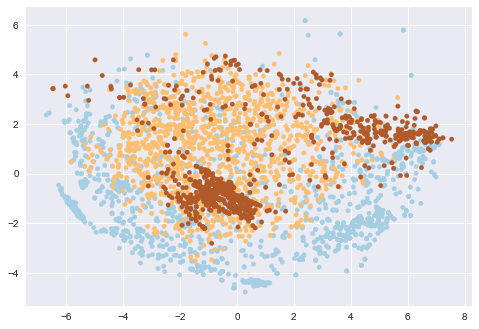

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

X=f
y=l.ravel()

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)
plt.style.use('seaborn')
plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=y, s=20, cmap=plt.cm.Paired)
#mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64,hop_length=1280,n_fft=2560).T,axis=0) 



In [18]:
np.save('f_norm_fea_22500_5#pre_mfcc_cry_glass_newnoise.npy',f)
np.save('l_norm_fea_22500_5#pre_mfcc_cry_glass_newnoise.npy',l)

In [ ]:
f=np.load('f_22500_5#pre_mfcc_cry_glass_newnoise.npy')
l=np.load('l_22500_5#pre_mfcc_cry_glass_newnoise.npy')

In [139]:
print(f.shape)
print(l.shape)

(3924, 64)
(3924, 1)


In [24]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [54]:
clf = SVC(kernel='rbf',C=10,gamma=0.1, degree=2,probability=True)
clf.fit(f, l.ravel())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
print(l.shape)

(3696, 1)


In [60]:
t, sample_rate = librosa.load('yt_bcc.wav',sr=16000,mono=True) 

In [61]:
pre_emphasis = 2
X = np.append(t[0], t[1:] - pre_emphasis * t[:-1])
stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

In [62]:
features_t=np.empty((0,64))
#ext_features_t = np.hstack([mfccs,mel,contrast,tonnetz])
features_t = np.vstack([features_t,mfccs])


In [63]:
print(l.shape)
print(l)

(2046, 1)
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [64]:
clf.predict(features_t)

array([0.])

In [65]:
clf.predict_proba(features_t)

array([[0.99765269, 0.00234731]])

In [69]:
def parser4(row):
    file_name = os.path.join("glass", 'glass_test'+ str(row) +'.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64)
        mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        mfcc=np.mean(mfccs.T,axis=0) 
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfcc

In [70]:
def feature_test():
    features=np.empty((0,64))
    y_test=np.empty((0,1))
    for i in range(1,99):
        mfccs=parser4(i)
        #ext_features = np.hstack([mfccs,rms,zcr])
        features = np.vstack([features,mfccs])
        y_test=np.vstack((y_test,2))
    return features,y_test

In [71]:
test_feature,y_test=feature_test()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


In [72]:
a=clf.predict(test_feature)
print(a)
clf.predict_proba(test_feature)


#print(y_test.shape)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2.]


array([[3.12536754e-02, 1.06444486e-02, 9.58101876e-01],
       [7.20436316e-03, 9.04251223e-04, 9.91891386e-01],
       [1.31350900e-01, 1.10685453e-03, 8.67542245e-01],
       [3.96742326e-06, 2.43745220e-06, 9.99993595e-01],
       [6.85689674e-04, 1.25214312e-03, 9.98062167e-01],
       [1.55957418e-03, 1.20120362e-03, 9.97239222e-01],
       [7.57576368e-05, 1.93780043e-03, 9.97986442e-01],
       [2.18255427e-06, 1.25204551e-06, 9.99996565e-01],
       [2.08464889e-02, 7.05037978e-02, 9.08649713e-01],
       [1.13712058e-01, 3.44049473e-02, 8.51882995e-01],
       [4.82980663e-02, 7.60228653e-03, 9.44099647e-01],
       [1.13516640e-01, 2.07460015e-02, 8.65737359e-01],
       [8.57058726e-02, 8.61188427e-03, 9.05682243e-01],
       [3.24902759e-02, 2.63305677e-02, 9.41179156e-01],
       [1.26655456e-02, 4.22507070e-04, 9.86911947e-01],
       [5.39597619e-03, 3.57196120e-04, 9.94246828e-01],
       [5.81322884e-03, 1.96672316e-04, 9.93990099e-01],
       [8.07778064e-03, 4.11672

In [73]:
for i,each in enumerate(a,start=1):
    print ("{}   {}".format(i,each))

1   2.0
2   2.0
3   2.0
4   2.0
5   2.0
6   2.0
7   2.0
8   2.0
9   2.0
10   2.0
11   2.0
12   2.0
13   2.0
14   2.0
15   2.0
16   2.0
17   2.0
18   2.0
19   2.0
20   2.0
21   2.0
22   2.0
23   2.0
24   2.0
25   2.0
26   2.0
27   2.0
28   2.0
29   2.0
30   2.0
31   2.0
32   2.0
33   2.0
34   2.0
35   2.0
36   2.0
37   2.0
38   2.0
39   1.0
40   2.0
41   2.0
42   2.0
43   2.0
44   2.0
45   2.0
46   2.0
47   2.0
48   2.0
49   2.0
50   2.0
51   2.0
52   2.0
53   2.0
54   2.0
55   2.0
56   1.0
57   1.0
58   2.0
59   2.0
60   2.0
61   2.0
62   2.0
63   1.0
64   1.0
65   1.0
66   1.0
67   1.0
68   1.0
69   1.0
70   0.0
71   0.0
72   1.0
73   0.0
74   0.0
75   2.0
76   2.0
77   2.0
78   2.0
79   2.0
80   0.0
81   2.0
82   2.0
83   2.0
84   0.0
85   2.0
86   0.0
87   2.0
88   2.0
89   2.0
90   2.0
91   2.0
92   2.0
93   2.0
94   0.0
95   2.0
96   2.0
97   2.0
98   2.0


In [74]:
print(test_feature.shape)
print(y_test.shape)

(98, 64)
(98, 1)


In [75]:
   np.unique(a,return_counts=True)

(array([0., 1., 2.]), array([ 8, 11, 79]))

In [76]:
acc = clf.score(test_feature, y_test)
print("acc=%0.3f" % acc)

acc=0.806


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(f, l.ravel(), test_size=0.4, random_state=0)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['poly','rbf'], 'gamma': [1e-2, 1e-1, 1],'C': [10,],'degree':[2,3,4]}]
                     
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print('')

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print('')
    print(clf.best_params_)
    print('')
    print("Grid scores on development set:")
    print('')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print('')
    print("Detailed classification report:")
    print('')
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print('')
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print('')

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.916 (+/-0.030) for {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
0.937 (+/-0.011) for {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.945 (+/-0.012) for {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
0.960 (+/-0.008) for {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.936 (+/-0.023) for {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
0.917 (+/-0.016) for {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
0.889 (+/-0.031) for {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
0.937 (+/-0.011) for {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.944 (+/-0.014) for {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
0.960 (+/-0.008) for {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
0.945 (+/-0.012) for {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'po